In [26]:
import gpflow
import numpy as np
from src.utils import create_dataset, plot_matrix, plot_matrix_cv
from sklearn.model_selection import KFold
from src.models.kernels import LambdaRBF, ARD_gpflow
from src.models.models import GPRLasso, GPR_gpflow
from src.models.validation import measure_mnll, measure_rmse, kfold_cv_model
import tensorflow as tf

In [27]:
X, Y = create_dataset('yacht', 0, False)
D = X.shape[1]
kfolds = KFold(n_splits = 8, shuffle=True, random_state=0)

## Lambda RBF

In [28]:
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': 0, 'tol_sparsity': 0.1}
results_GPR_LRBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='LRBF', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: LRBF; --
Average test RMSE: 0.026
Average test MNLL: 2.108



name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(21,)",float64,"[0.40825, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


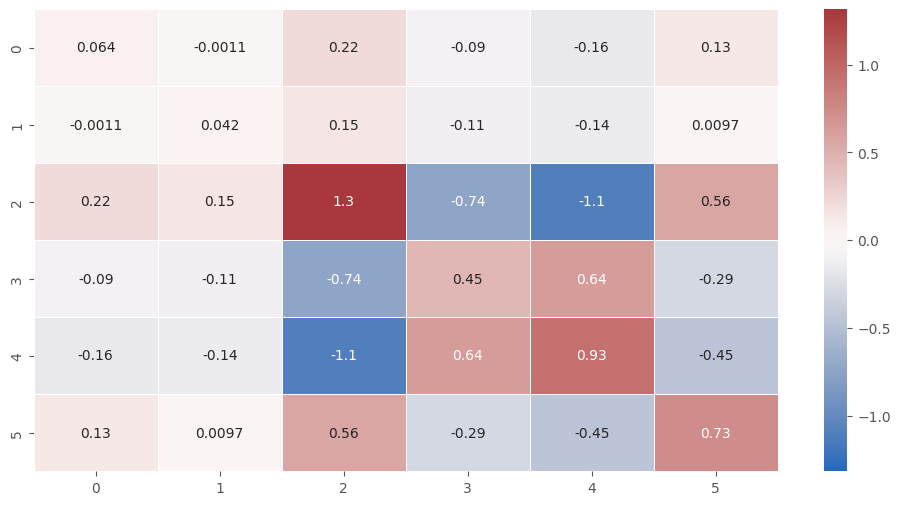

In [29]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X, Y), kernel=LRBF, lasso=0)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())

In [30]:
precision_dict_sorted = gpr_lasso_LRBF.kernel.precision_dict()
covariance_dict_sorted = gpr_lasso_LRBF.kernel.covariance_dict()

## ARD RBF

In [31]:
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': 0.1, 'tol_sparsity': 0.1}
results_GPR_LRBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='RBF-ARD', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: RBF-ARD; --
Average test RMSE: 0.030
Average test MNLL: 1.502



name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.kernel.lengthscales,Parameter,Softplus,,True,"(6,)",float64,"[2.44949, 2.44949, 2.44949..."
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


2023-04-18 17:11:30.476977: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


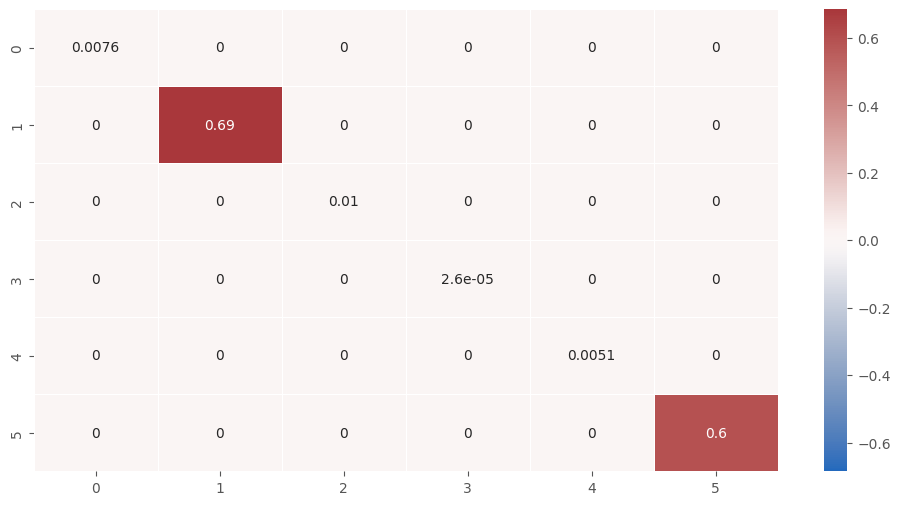

In [32]:
RBF_ARD = ARD_gpflow(variance=1.0, randomized=False, d=D)
gpr_lasso_RBF_ARD = GPRLasso(data=(X, Y), kernel=RBF_ARD, lasso=0)
gpflow.utilities.print_summary(gpr_lasso_RBF_ARD, fmt="notebook")
gpr_lasso_RBF_ARD.train()
plot_matrix(gpr_lasso_RBF_ARD.kernel.precision())

In [33]:
lengthscales_dict_sorted = gpr_lasso_RBF_ARD.kernel.lengthscales_dict()
lengthscales_dict_sorted

[{'i': 3, 'j': 3, 'l': 195.6648444065191},
 {'i': 4, 'j': 4, 'l': 14.033402775808359},
 {'i': 0, 'j': 0, 'l': 11.499250726370873},
 {'i': 2, 'j': 2, 'l': 9.795413412743338},
 {'i': 5, 'j': 5, 'l': 1.2951710688600497},
 {'i': 1, 'j': 1, 'l': 1.208207465732003}]

In [34]:
covariance_dict_sorted

[{'i': 3, 'j': 3, 'c': 7107596923.533215},
 {'i': 0, 'j': 3, 'c': 6458198235.636061},
 {'i': 0, 'j': 0, 'c': 5868133832.590575},
 {'i': 3, 'j': 4, 'c': 3752679951.672468},
 {'i': 0, 'j': 4, 'c': 3409807740.2285023},
 {'i': 2, 'j': 3, 'c': 1990657163.3348408},
 {'i': 4, 'j': 4, 'c': 1981359806.1653554},
 {'i': 0, 'j': 2, 'c': 1808778569.5314672},
 {'i': 1, 'j': 3, 'c': 1401605127.1711857},
 {'i': 0, 'j': 1, 'c': 1273544418.637228},
 {'i': 2, 'j': 4, 'c': 1051019543.5787039},
 {'i': 1, 'j': 4, 'c': 740030995.2986286},
 {'i': 2, 'j': 2, 'c': 557540623.8663213},
 {'i': 1, 'j': 2, 'c': 392547058.3488013},
 {'i': 1, 'j': 1, 'c': 276400998.26032746},
 {'i': 3, 'j': 5, 'c': 181727135.7279838},
 {'i': 0, 'j': 5, 'c': 165123356.93277523},
 {'i': 4, 'j': 5, 'c': 95947884.52326092},
 {'i': 2, 'j': 5, 'c': 50897661.79956649},
 {'i': 1, 'j': 5, 'c': 35835764.8944746},
 {'i': 5, 'j': 5, 'c': 4646439.432576778}]

In [35]:
precision_dict_sorted

[{'i': 2, 'j': 2, 'l': 1.3154878511947072},
 {'i': 2, 'j': 4, 'l': 1.099706344334123},
 {'i': 4, 'j': 4, 'l': 0.9321189612262155},
 {'i': 2, 'j': 3, 'l': 0.7382514474468825},
 {'i': 5, 'j': 5, 'l': 0.730922903798994},
 {'i': 3, 'j': 4, 'l': 0.6371831046132073},
 {'i': 2, 'j': 5, 'l': 0.5552887162493894},
 {'i': 4, 'j': 5, 'l': 0.44829284556808663},
 {'i': 3, 'j': 3, 'l': 0.4468574540006491},
 {'i': 3, 'j': 5, 'l': 0.2922898857434544},
 {'i': 0, 'j': 2, 'l': 0.2151022459199985},
 {'i': 0, 'j': 4, 'l': 0.16109565249058658},
 {'i': 1, 'j': 2, 'l': 0.14988217968912723},
 {'i': 1, 'j': 4, 'l': 0.1422091632279392},
 {'i': 0, 'j': 5, 'l': 0.12843592977403312},
 {'i': 1, 'j': 3, 'l': 0.11008731711393259},
 {'i': 0, 'j': 3, 'l': 0.09034798320829028},
 {'i': 0, 'j': 0, 'l': 0.06433554729708063},
 {'i': 1, 'j': 1, 'l': 0.04179648158526709},
 {'i': 1, 'j': 5, 'l': 0.009684733948519887},
 {'i': 0, 'j': 1, 'l': 0.001122441532115929}]

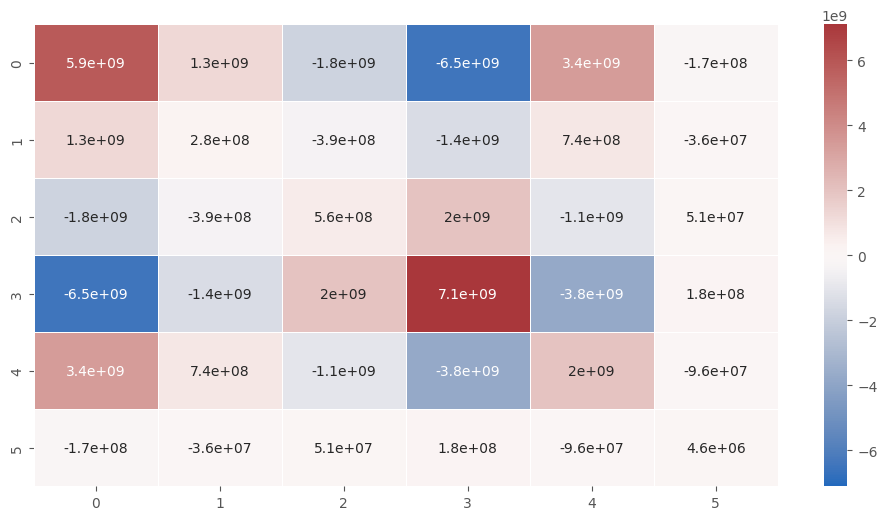

In [36]:
plot_matrix(tf.linalg.inv(gpr_lasso_LRBF.kernel.precision()))

In [37]:
points = []
precision = np.abs(gpr_lasso_LRBF.kernel.precision().numpy())
covariance = np.abs(tf.linalg.inv(gpr_lasso_LRBF.kernel.precision()).numpy())
for i in range(D):
    for j in range(D):
        points.append({'i': i, 'j': j, 'c': covariance[i][j], 'p': precision[i][j]}) if i <= j else None
points

[{'i': 0, 'j': 0, 'c': 5868133832.590575, 'p': 0.06433554729708063},
 {'i': 0, 'j': 1, 'c': 1273544418.637228, 'p': 0.001122441532115929},
 {'i': 0, 'j': 2, 'c': 1808778569.5314672, 'p': 0.2151022459199985},
 {'i': 0, 'j': 3, 'c': 6458198235.636061, 'p': 0.09034798320829028},
 {'i': 0, 'j': 4, 'c': 3409807740.2285023, 'p': 0.16109565249058658},
 {'i': 0, 'j': 5, 'c': 165123356.93277523, 'p': 0.12843592977403312},
 {'i': 1, 'j': 1, 'c': 276400998.26032746, 'p': 0.04179648158526709},
 {'i': 1, 'j': 2, 'c': 392547058.3488013, 'p': 0.14988217968912723},
 {'i': 1, 'j': 3, 'c': 1401605127.1711857, 'p': 0.11008731711393259},
 {'i': 1, 'j': 4, 'c': 740030995.2986286, 'p': 0.1422091632279392},
 {'i': 1, 'j': 5, 'c': 35835764.8944746, 'p': 0.009684733948519887},
 {'i': 2, 'j': 2, 'c': 557540623.8663213, 'p': 1.3154878511947072},
 {'i': 2, 'j': 3, 'c': 1990657163.3348408, 'p': 0.7382514474468825},
 {'i': 2, 'j': 4, 'c': 1051019543.5787039, 'p': 1.099706344334123},
 {'i': 2, 'j': 5, 'c': 50897661.

In [42]:
def include_feature(features_selected, dict):
    features_selected[dict['i']] = True
    features_selected[dict['j']] = True
    return features_selected


In [46]:
X_train, Y_train,  X_test, Y_test, Y_train_mean, Y_train_std = create_dataset('boston', 0)
# Include one feature at a time from lenghtscales relevance
features_selected = np.zeros(D)
for i in range(len(covariance_dict_sorted)):
    features_selected = include_feature(features_selected, covariance_dict_sorted[i])
    num_features_selected = int(np.sum(features_selected))
    print(features_selected)
# Include one feature at a time from covariance relevance

[0. 0. 0. 1. 0. 0.]
[1. 0. 0. 1. 0. 0.]
[1. 0. 0. 1. 0. 0.]
[1. 0. 0. 1. 1. 0.]
[1. 0. 0. 1. 1. 0.]
[1. 0. 1. 1. 1. 0.]
[1. 0. 1. 1. 1. 0.]
[1. 0. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 0.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1.]
